In [13]:
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
import matplotlib.dates as mdates
from collections import deque
import numpy as np

import serial
import re

PORT = "/dev/cu.usbserial-1140"

# How many sensor samples we want to store
HISTORY_SIZE = 2500

# Pause re-sampling the sensor and drawing for INTERVAL seconds
INTERVAL = 0.01


In [14]:
serialport = None

def get_imu_data():
    global serialport
    if not serialport:
        # open serial port
        serialport = serial.Serial(PORT, 115200, timeout=0.1)
        # check which port was really used
        print("Opened", serialport.name)
        # Flush input
        time.sleep(3)
        serialport.readline()

    # Poll the serial port
    line = str(serialport.readline(), 'utf-8')
    if not line:
        return None
    vals = line.strip().split('\t')
    if len(vals) != 3:
        return None
    try:
        vals = [float(i) for i in vals]
    except ValueError:
        return None
    #print(vals)
    return vals

for _ in range(10):
    print(get_imu_data())
    time.sleep(0.1)

Opened /dev/cu.usbserial-1140
[9.62, -0.23, 0.15]
[58.0, -0.27, 0.15]
[9.58, -0.23, 0.11]
[9.62, -0.27, 0.19]
[9.58, -0.27, 0.19]
[9.62, -0.27, 0.15]
[9.58, -0.27, 0.19]
[9.62, -0.23, 0.15]
[9.58, -0.23, 0.15]
[9.62, -0.27, 0.15]


# CALIBRAZIONE


In [15]:
n = 2000
XUP = []
YUP = []
ZUP = []
XDOWN = []
YDOWN = []
ZDOWN = []
print("XUP")
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(XUP) < n:
    acc = get_imu_data()
    if not acc:
        continue
    XUP.append(acc)

print("FINITO!!")

print(XUP[1])

print("YUP")
time.sleep(20)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(YUP) < n:
    acc = get_imu_data()
    if not acc:
        continue
    YUP.append(acc)

print("FINITO!!")

print(YUP[1])

print("ZUP")
time.sleep(20)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(ZUP) < n:
    acc = get_imu_data()
    if not acc:
        continue
    ZUP.append(acc)

print("FINITO!!")

print(ZUP[1])

print("XDOWN")
time.sleep(20)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(XDOWN) < n:
    acc = get_imu_data()
    if not acc:
        continue
    XDOWN.append(acc)

print("FINITO!!")

print(XDOWN[1])

print("YDOWN")
time.sleep(20)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(YDOWN) < n:
    acc = get_imu_data()
    if not acc:
        continue
    YDOWN.append(acc)

print("FINITO!!")

print(YDOWN[1])

print("ZDOWN")
time.sleep(20)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(ZDOWN) < n:
    acc = get_imu_data()
    if not acc:
        continue
    ZDOWN.append(acc)

print("FINITO!!")

print(ZDOWN[1])
    


XUP
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[9.62, -0.23, 0.08]
YUP
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[-0.31, 9.66, -0.38]
ZUP
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[-0.19, -0.27, 9.58]
XDOWN
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[-9.85, -0.04, -0.19]
YDOWN
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[-0.04, -9.96, -0.08]
ZDOWN
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-1140
FINITO!!
[-0.11, 0.0, -10.04]


# # EXPORTING CSV


In [16]:
import csv

with open('XUP', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(XUP)

with open('YUP', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(YUP)

with open('ZUP', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(ZUP)
    
with open('XDOWN', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(XDOWN)
    
with open('YDOWN', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(YDOWN)
    
with open('ZDOWN', 'w+') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerows(ZDOWN)

In [14]:
ZDOWN = []
print("ZDOWN")
time.sleep(2)
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING ACC DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

while len(ZDOWN) < n:
    acc = get_imu_data()
    if not acc:
        continue
    ZDOWN.append(acc)

print("FINITO!!")

print(ZDOWN[1])

ZDOWN
Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-210
FINITO!!
[-0.42, -0.15, -10.04]


# Calibrazione accelerometro


Put down the board and do not touch or move it!
3...2...1...COLLECTING ACC DATA
Opened /dev/cu.usbserial-210
Acc X range:  -0.11 -0.04
Acc Y range:  0.15 0.23
Acc Z range:  9.54 9.58
Final calibration in m/s^2: [-0.075, 0.19, -0.240000000000002]


<IPython.core.display.Javascript object>


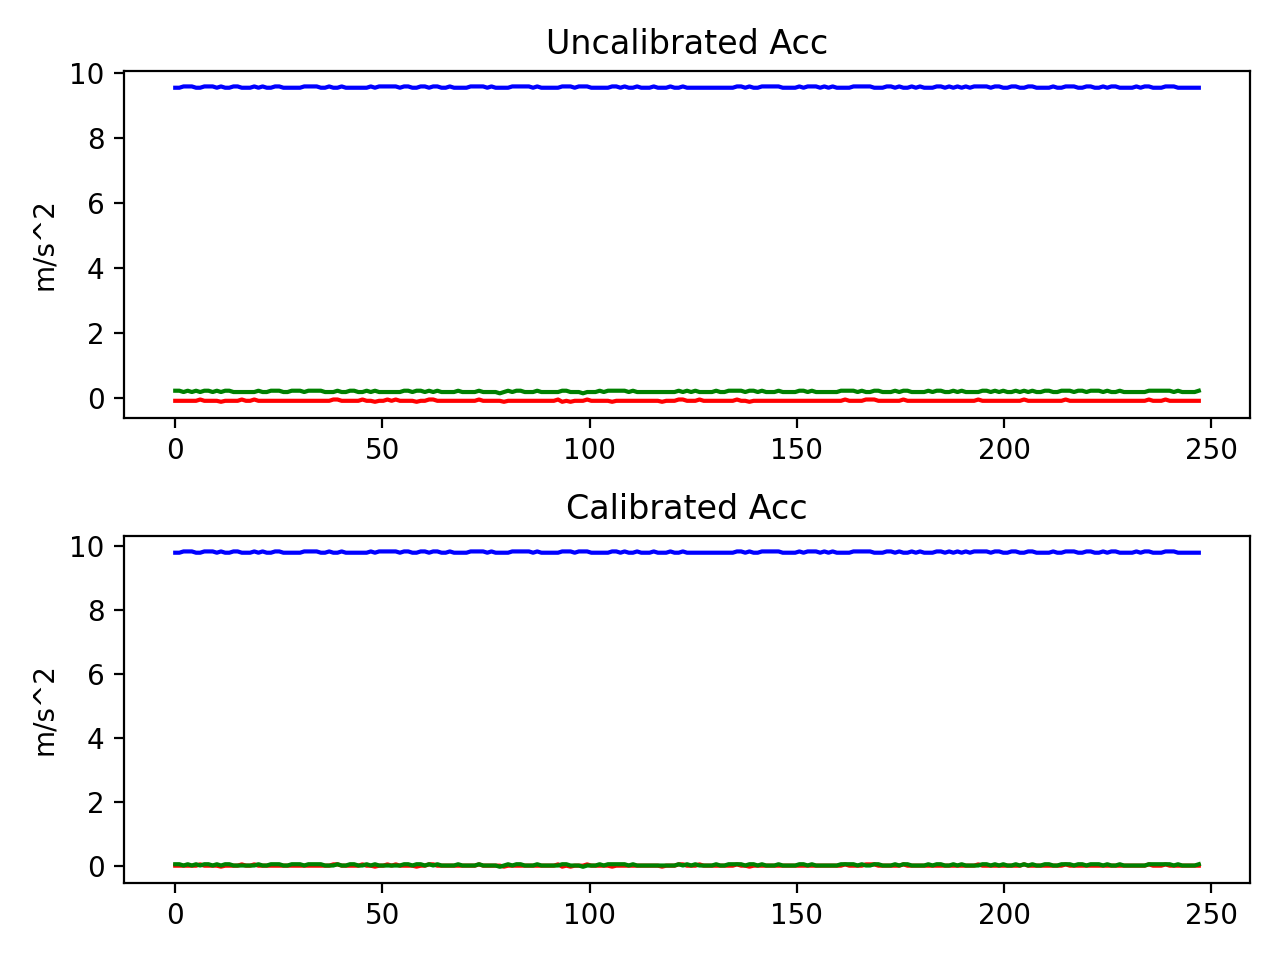

In [4]:


# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

# Deque for axes
acc_x = deque(maxlen=HISTORY_SIZE//10)
acc_y = deque(maxlen=HISTORY_SIZE//10)
acc_z = deque(maxlen=HISTORY_SIZE//10)
while len(acc_x) < (HISTORY_SIZE//10):
    ret = get_imu_data()
    #print(ret)
    if not ret:
        continue
    x, y, z = ret[:3]
    acc_x.append(x)
    acc_y.append(y)
    acc_z.append(z)

for _ in range(3):
    acc_x.popleft()
    acc_y.popleft()
    acc_z.popleft()

min_x = min(acc_x)
max_x = max(acc_x)
min_y = min(acc_y)
max_y = max(acc_y)
min_z = min(acc_z)
max_z = max(acc_z)

print("Acc X range: ", min_x, max_x)
print("Acc Y range: ", min_y, max_y)
print("Acc Z range: ", min_z, max_z)

acc_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2 - 9.8]
print("Final calibration in m/s^2:", acc_calibration)

fig, (uncal, cal) = plt.subplots(2, 1)

# Clear all axis
uncal.cla()
t = np.linspace(0, len(acc_x), len(acc_x))
# plot uncalibrated data
uncal.plot(t, acc_x, color='r')
uncal.plot(t, acc_y, color='g')
uncal.plot(t, acc_z, color='b')
uncal.title.set_text("Uncalibrated Acc")
uncal.set(ylabel='m/s^2')
# plot calibrated data
cal.plot(t, [x - acc_calibration[0] for x in acc_x], color='r')
cal.plot(t, [y - acc_calibration[1] for y in acc_y], color='g')
cal.plot(t, [z - acc_calibration[2] for z in acc_z], color='b')
cal.title.set_text("Calibrated Acc")
cal.set(ylabel='m/s^2')

fig.tight_layout()
fig.show()
serialport.close()

# Magnetometer data capture

<IPython.core.display.Javascript object>


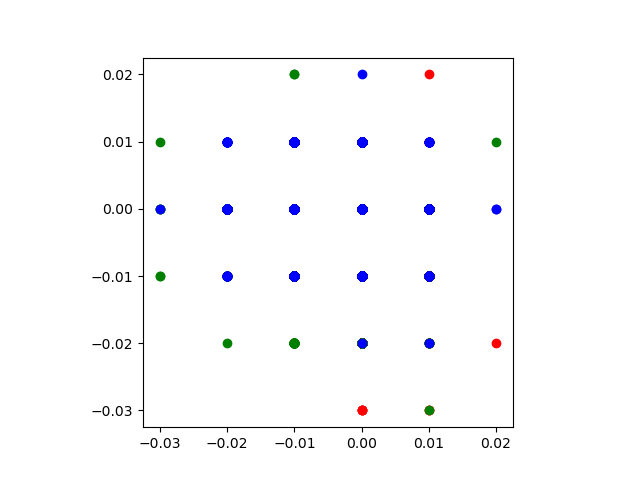

/var/folders/h5/7n7msg4563g7zkxcnrmgvl480000gn/T/ipykernel_84810/880064467.py:46: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, animate)


In [31]:
# Deque for axes
mag_x = deque(maxlen=HISTORY_SIZE)
mag_y = deque(maxlen=HISTORY_SIZE)
mag_z = deque(maxlen=HISTORY_SIZE)

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None
anim = None

def onClick(event):
    anim.event_source.stop()
    
def animate(i):
    for _ in range(30):
        ret = get_imu_data()
        if not ret:
            continue
        x, y, z = ret[6:9]
        mag_x.append(x)
        mag_y.append(y)
        mag_z.append(z)

    # Clear all axis
    ax.cla()

    # Display the sub-plots
    ax.scatter(mag_x, mag_y, color='r')
    ax.scatter(mag_y, mag_z, color='g')
    ax.scatter(mag_z, mag_x, color='b')
    
    if len(mag_x) == HISTORY_SIZE:
        anim.event_source.stop()
    # Pause the plot for INTERVAL seconds 
    plt.pause(INTERVAL)

fig.canvas.mpl_connect('button_press_event', onClick)    
anim = FuncAnimation(fig, animate)

X range:  -0.63 -0.53
Y range:  0.04 0.18
Z range:  -1.1 -0.98
Final calibration in uTesla: [-0.5800000000000001, 0.11, -1.04]


<IPython.core.display.Javascript object>


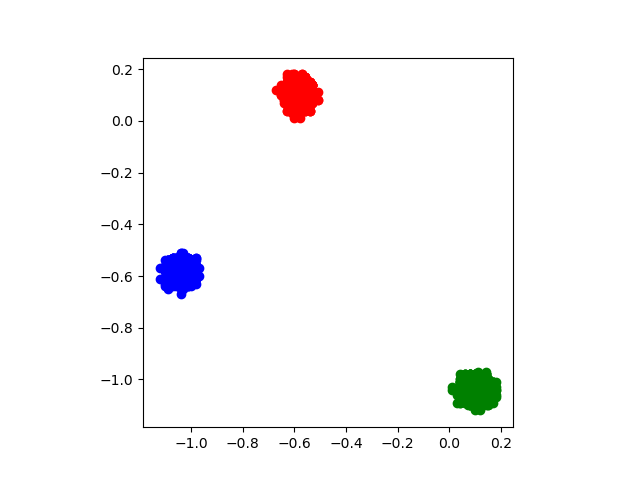

In [27]:
min_x = min(mag_x)
max_x = max(mag_x)
min_y = min(mag_y)
max_y = max(mag_y)
min_z = min(mag_z)
max_z = max(mag_z)

print("X range: ", min_x, max_x)
print("Y range: ", min_y, max_y)
print("Z range: ", min_z, max_z)

mag_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [x - mag_calibration[0] for x in mag_x]
cal_mag_y = [y - mag_calibration[1] for y in mag_y]
cal_mag_z = [z - mag_calibration[2] for z in mag_z]

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# Clear all axis
ax.cla()

# Display the now calibrated data
ax.scatter(cal_mag_x, cal_mag_y, color='r')
ax.scatter(cal_mag_y, cal_mag_z, color='g')
ax.scatter(cal_mag_z, cal_mag_x, color='b')
fig.show()

# Gyroscope offset calibration

Put down the board and do not touch or move it!
3...2...1...COLLECTING GYRO DATA
Opened /dev/cu.usbserial-210
Gyro X range:  -0.01 0.01
Gyro Y range:  -0.02 0.01
Gyro Z range:  -0.02 0.02
Final calibration in rad/s: [0.0, -0.005, 0.0]


<IPython.core.display.Javascript object>


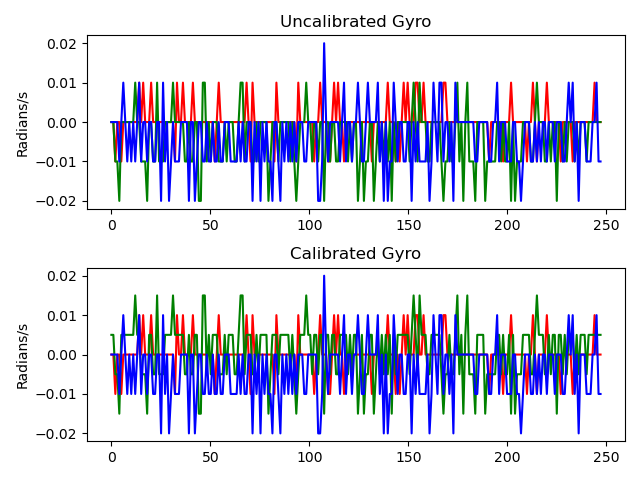

In [30]:
print("Put down the board and do not touch or move it!")
for s in range(3, 0, -1):
    print(s, end='...')
    time.sleep(1)
print("COLLECTING GYRO DATA")

# close port in case its open
if serialport:
    try:
        serialport.close()
    except NameError:
        pass

serialport = None

# Deque for axes
gyro_x = deque(maxlen=HISTORY_SIZE//10)
gyro_y = deque(maxlen=HISTORY_SIZE//10)
gyro_z = deque(maxlen=HISTORY_SIZE//10)
while len(gyro_x) < (HISTORY_SIZE//10):
    ret = get_imu_data()
    #print(ret)
    if not ret:
        continue
    x, y, z = ret[3:6]
    gyro_x.append(x)
    gyro_y.append(y)
    gyro_z.append(z)

for _ in range(3):
    gyro_x.popleft()
    gyro_y.popleft()
    gyro_z.popleft()

min_x = min(gyro_x)
max_x = max(gyro_x)
min_y = min(gyro_y)
max_y = max(gyro_y)
min_z = min(gyro_z)
max_z = max(gyro_z)

print("Gyro X range: ", min_x, max_x)
print("Gyro Y range: ", min_y, max_y)
print("Gyro Z range: ", min_z, max_z)

gyro_calibration = [ (max_x + min_x) / 2, (max_y + min_y) / 2, (max_z + min_z) / 2]
print("Final calibration in rad/s:", gyro_calibration)

fig, (uncal, cal) = plt.subplots(2, 1)

# Clear all axis
uncal.cla()
t = np.linspace(0, len(gyro_x), len(gyro_x))
# plot uncalibrated data
uncal.plot(t, gyro_x, color='r')
uncal.plot(t, gyro_y, color='g')
uncal.plot(t, gyro_z, color='b')
uncal.title.set_text("Uncalibrated Gyro")
uncal.set(ylabel='Radians/s')
# plot calibrated data
cal.plot(t, [x - gyro_calibration[0] for x in gyro_x], color='r')
cal.plot(t, [y - gyro_calibration[1] for y in gyro_y], color='g')
cal.plot(t, [z - gyro_calibration[2] for z in gyro_z], color='b')
cal.title.set_text("Calibrated Gyro")
cal.set(ylabel='Radians/s')

fig.tight_layout()
fig.show()
serialport.close()